In [1]:
library(reticulate)
suppressMessages(library(igraph))
library(gasper)
library(gridExtra)
library(ggplot2)

library(JuliaCall)
suppressMessages(julia_setup())

#getwd()
#Sys.getenv("R_USER")
#help(igraph)

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Drawing Graphs With R</strong></div>

For more information, see
* [**IGraph**](https://cran.r-project.org/web//packages/igraph/vignettes/igraph.html)
* [**Gasper: Graph Signal Processing in R**](https://cran.r-project.org/web//packages/gasper/vignettes/gasper_vignette.pdf)

# 1. IGraph

In [2]:
g           <- make_graph(edges = c(1,2, 1,5, 2,3,  2,4, 3,5 ), 5, directed = TRUE)
V(g)$f      <- c(3,-1,2,4,-2)
E(g)$weight <- c( 11,12,13,14,15)
g

IGRAPH d5df5bf D-W- 5 5 -- 
+ attr: f (v/n), weight (e/n)
+ edges from d5df5bf:
[1] 1->2 1->5 2->3 2->4 3->5

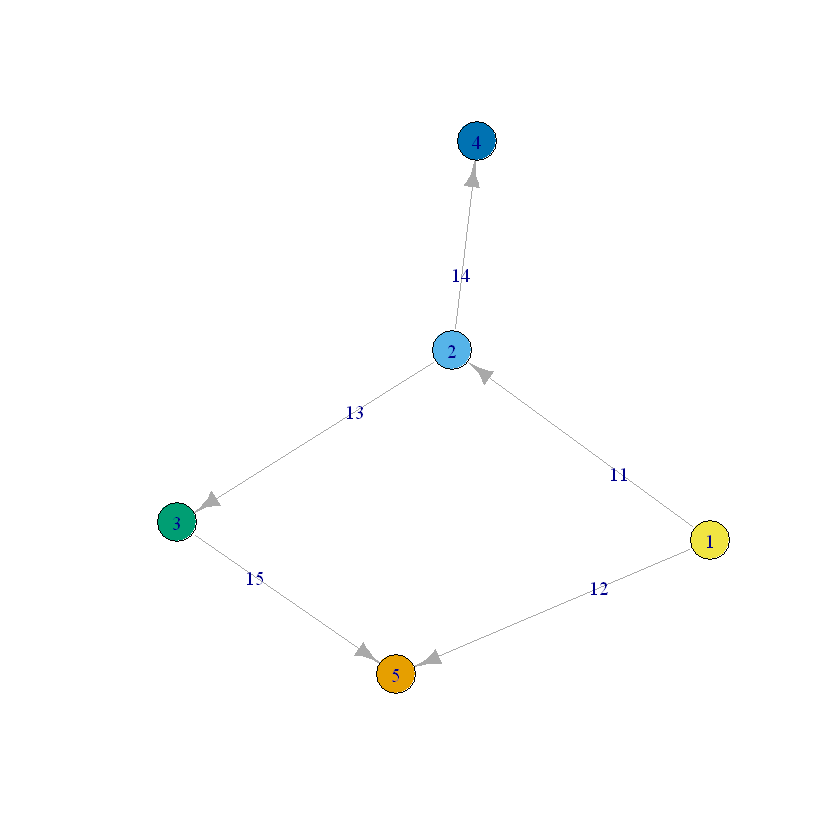

In [3]:
plot(g, vertex.color=as.factor(V(g)$f), edge.label=as.factor(E(g)$weight ))

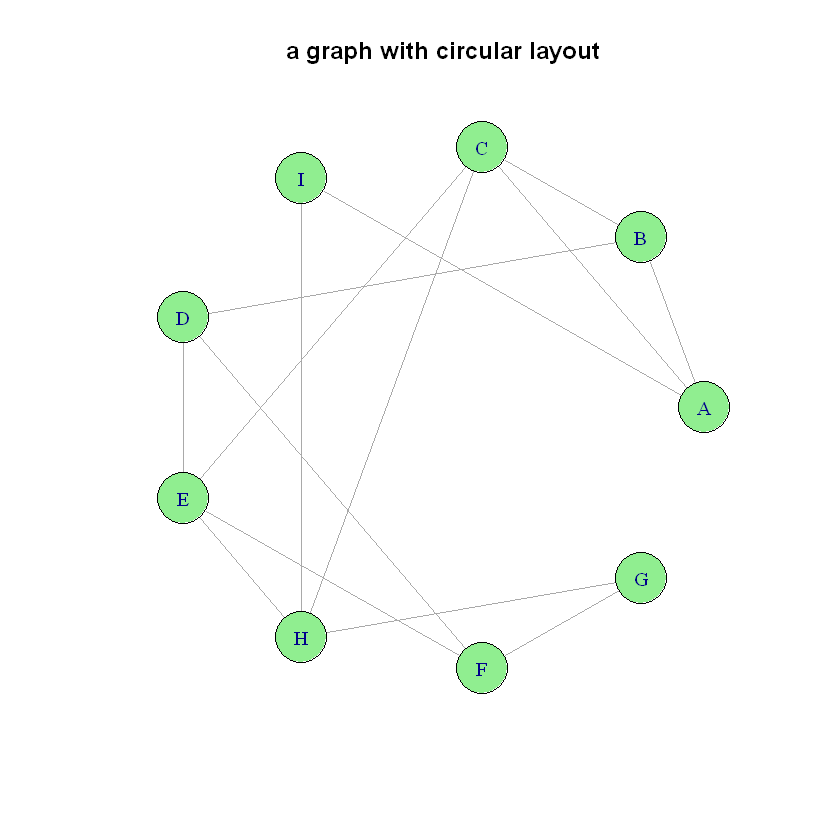

In [4]:
g1 <- graph_from_literal(A-B:C:I, B-A:C:D, C-A:B:E:H, D-B:E:F,
                         E-C:D:F:H, F-D:E:G, G-F:H, H-C:E:G:I,
                         I-A:H)

layout <- layout_in_circle(g1)
plot(g1, layout=layout, main="a graph with circular layout", vertex.color='lightgreen', vertex.size=20)

# 2. Gasper

In [6]:
#download a graph
matrixname <- "grid1"
groupname <- "AG-Monien"
download_graph(matrixname, groupname)
attributes(grid1)

$names
[1] "sA"   "xy"   "dim"  "temp"

In [7]:
str(grid1$sA)

Formal class 'dsCMatrix' [package "Matrix"] with 7 slots
  ..@ i       : int [1:476] 173 174 176 70 71 74 74 75 77 77 ...
  ..@ p       : int [1:253] 0 3 6 9 12 15 18 21 24 27 ...
  ..@ Dim     : int [1:2] 252 252
  ..@ Dimnames:List of 2
  .. ..$ : NULL
  .. ..$ : NULL
  ..@ x       : num [1:476] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ uplo    : chr "L"
  ..@ factors : list()


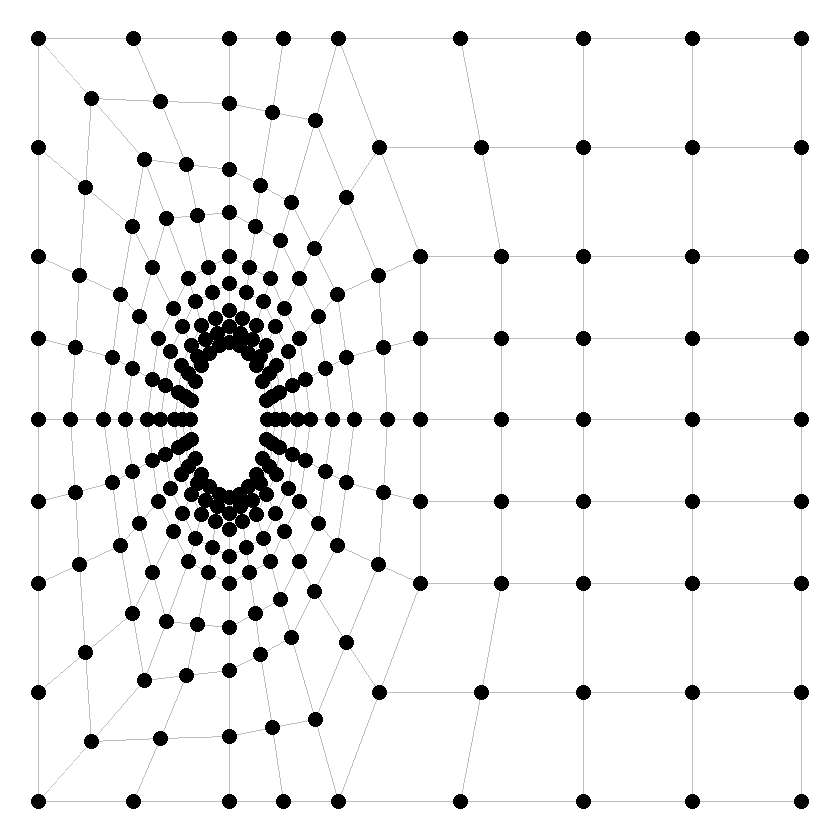

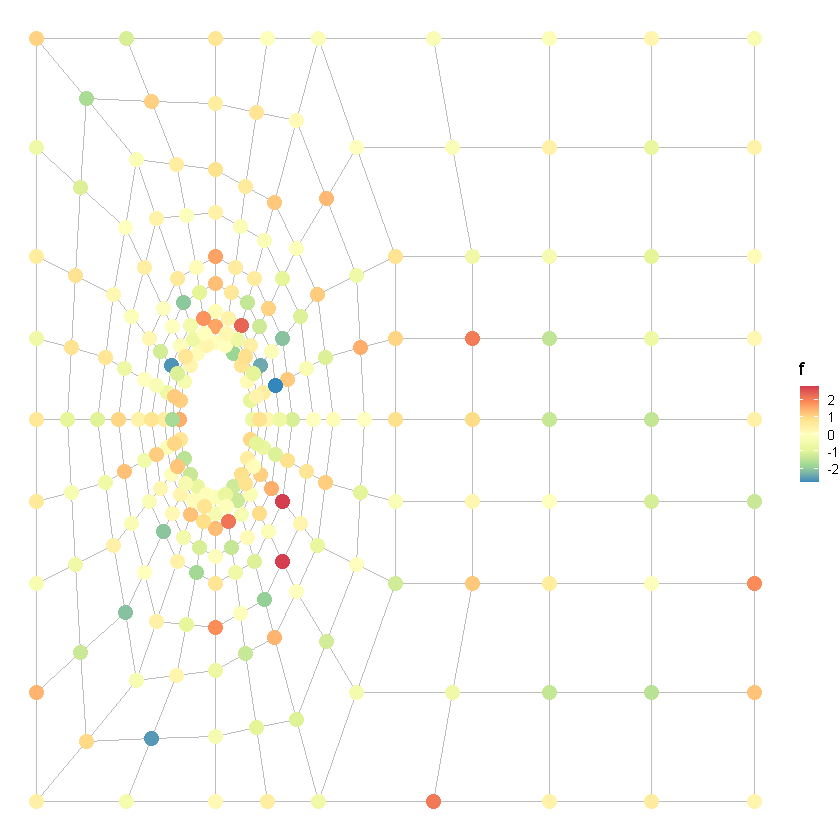

In [8]:
f <- rnorm(nrow(grid1$sA))   # compute values at the vertices
plot_graph(grid1, size=4); plot_signal(grid1, f, size = 4)

# 3. Julia Interface

* see [**Julia Interface**](https://hwborchers.github.io/#plotting-functionality)

In [ ]:
# julia_call("sqrt", 2.0)

In [9]:
julia_command('ENV["GKSwstype"] = "gksqt"')
julia_command("using Plots")
julia_command("gr()")

gksqt

Plots.GRBackend()

In [ ]:
julia_command("using Laplacians; a = chimera(99,5); spectral_drawing(a);")